#  Solutions to Exercises
Author: Rebekah Esmaili (rebekah.esmaili@gmail.com)
 
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from cartopy import crs as ccrs
import scipy.interpolate
import s3fs

## 1. Basic Data Analysis and Visualization

**Exercise 1:** Learning to use notebooks

1. Launch Jupyter Notebook and create a new notebook
2. Rename the notebook
3. Create a new cell and use ```type()``` to see if the following are floats and integers:
    * ```2+2```
    * ```2*2.0```
    * ```var_float/var_int```
---
**Solution:**

In [3]:
var_int = 8
var_float = 15.0

type(2+2), type(2*2.0), type(var_float/var_int)

(int, float, float)

### Exercise 2: Import an ascii file

1. Import the dataset ```data/20230401_20230430_Lake_Lefroy.lev15``` and save it to a variable called ```aeronet```.
2. Print the column names
3. Find a column that doesn't have only missing values (-999) and (challenge!) calculate the mean using the following syntax ```variable["column"].mean()```
---
**Solution:**

In [4]:
fname = "data/20230401_20230430_Lake_Lefroy.lev15"
aeronet = pd.read_csv(fname, sep=',\s*', engine='python')

In [5]:
aeronet.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,08:04:2023,23:20:54,98,98.972847,-999.0,0.040462,0.043801,-999.0,-999.0,0.047209,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,08:04:2023,23:23:00,98,98.974306,-999.0,0.039768,0.042688,-999.0,-999.0,0.046141,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,08:04:2023,23:31:37,98,98.980289,-999.0,0.040011,0.043069,-999.0,-999.0,0.046833,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,08:04:2023,23:33:32,98,98.981620,-999.0,0.039021,0.041912,-999.0,-999.0,0.045663,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,08:04:2023,23:35:55,98,98.983275,-999.0,0.038642,0.041935,-999.0,-999.0,0.045361,...,0.3808,0.3401,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [6]:
aeronet["AOD_870nm"].mean()

-1.5111960432098768

---
### Exercise 3: Filtering data

Using the dataset imported in the previous example (*aeronet*):
    
1. Create a mask that filters the "AOD_870nm" column to only include values that are above 0.
2. Create a new variables, *day_of_year*, with the mask applied to aeronet\["Day_of_Year(Fraction)"\].
3. Create a new variables, *aod_870*, with the mask applied to aeronet\["AOD_870nm"\].
4. Compare the mean value of *aeronet\["AOD_870nm"\]* to *aod_870*.
    
---
**Solution**

In [7]:
mask_aod = (aeronet["AOD_870nm"] > 0 )

In [8]:
day_of_year = aeronet["Day_of_Year(Fraction)"][mask_aod]
aod_870 = aeronet["AOD_870nm"][mask_aod]

In [9]:
aeronet["AOD_870nm"].mean(), aod_870.mean()

(-1.5111960432098768, 0.030517718701700152)

---
### Exercise 4: Create a scatterplot

Use the variables *aod_870* and *day_of_year* that you made in Exercise 3 to:

1. Create a scatter plot showing the *day_of_year* (x-axis) and *aod_870* (y-axis)
2. Add y-axis and x-axis labels using *.set_xlabel()* and *.set_ylabel()*
3. Adjust the color and size of the scatterplot

---
**Solution**

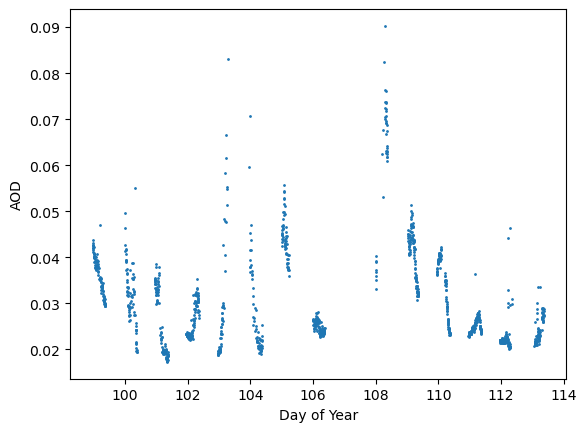

In [74]:
fig = plt.figure() 
ax = plt.subplot()
ax.scatter(day_of_year, aod_870, s=1)
ax.set_xlabel('Day of Year')
ax.set_ylabel('AOD')
plt.show()

## 2. Scientific Data Formats and Advanced Plotting

---
### Exercise 1: Importing netCDF files
1. Open the file "data/OR_ABI-L2-SSTF-M6_G18_s20231122000211_e20231122059519_c20231122105091.nc" using the xarray library
2. Print the variable names
3. What are the dimensions?
---

**Solution:**

In [11]:
fname = 'data/OR_ABI-L2-SSTF-M6_G18_s20231122000211_e20231122059519_c20231122105091.nc' 
sst_file_id = xr.open_dataset(fname, engine='h5netcdf')

In [12]:
sst_file_id

<xarray.Dataset>
Dimensions:                                                 (y: 5424, x: 5424, number_of_time_bounds: 2, number_of_image_bounds: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, SST_night_only_emissive_band: 1, SST_day_night_emissive_bands: 4)
Coordinates: (12/14)
    t                                                       datetime64[ns] ...
  * y                                                       (y) float32 0.151...
  * x                                                       (x) float32 -0.15...
    y_image                                                 float32 ...
    x_image                                                 float32 ...
    retrieval_local_zenith_angle                            float32 ...
    ...                                                      ...
    day_solar_zenith_angle                                  float32 ...
    night_solar_zenith_angle                                float32 ...
    SST_night_only_emissive_wavelength                      (SST_night_only_emissive_band) float32 ...
    SST_day_night_emissive_wavelengths                      (SST_day_night_emissive_bands) float32 ...
    SST_night_only_emissive_band_id                         (SST_night_only_emissive_band) int8 ...
    SST_day_night_emissive_band_ids                         (SST_day_night_emissive_bands) int8 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, number_of_LZA_bounds, number_of_SZA_bounds, SST_night_only_emissive_band, SST_day_night_emissive_bands
Data variables: (12/42)
    SST                                                     (y, x) float32 ...
    DQF                                                     (y, x) float32 ...
    time_bounds                                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                                  int32 ...
    y_image_bounds                                          (number_of_image_bounds) float32 ...
    x_image_bounds                                          (number_of_image_bounds) float32 ...
    ...                                                      ...
    retrieval_solar_zenith_angle_bounds                     (number_of_SZA_bounds) float32 ...
    day_solar_zenith_angle_bounds                           (number_of_SZA_bounds) float32 ...
    night_solar_zenith_angle_bounds                         (number_of_SZA_bounds) float32 ...
    twilight_solar_zenith_angle_bounds                      (number_of_SZA_bounds) float32 ...
    percent_uncorrectable_GRB_errors                        float32 ...
    percent_uncorrectable_L0_errors                         float32 ...
Attributes: (12/34)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    long_name:                 standard deviation of the difference of the ob...
    _FillValue:                -999.0
    units:                     K
    grid_mapping:              goes_imager_projection
    cell_methods:              quantitative_local_zenith_angle: sum retrieval...
    id:                        53561a7e-349d-4978-a49b-203f58021ccc

---
### Exercise 2: Plot 3-dimensional data

Plot *AOD_lat*, *AOD_lon*, and *AOD_500* (which we imported from the "JRR-AOD_v2r3_j01_..." netCDF file as:

1. Check the dimensions for all variables using *.shape*.
2. Do you need to generate a meshgrid with *np.meshgrid()*?
3. Create a contour plot

---
**Solution:**

In [48]:
sst = sst_file_id['SST']
x = sst_file_id['x']
y = sst_file_id['y']

In [49]:
# After checking the shape, the data are already in 2D, so we don't need to use meshgrid.
x.shape, y.shape, sst.shape

((5424,), (5424,), (5424, 5424))

In [50]:
sst_x, sst_y = np.meshgrid(x, y)

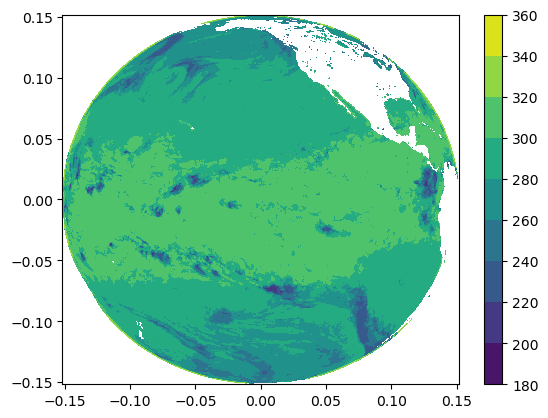

In [52]:
fig = plt.figure()
ax = plt.subplot()

tmp = ax.contourf(x, y, sst)
fig.colorbar(tmp)

plt.show()

---
### Exercise 3: Adding maps to plots

Using *lat_rsr*, *lon_rsr*, and *rsr* (which we imported from the "OR_ABI-L2-RSRF-M6_G16_..." netCDF file):

1. Create a *contourf* plot (same as Exercise 2)
2. Add the coastlines to a standard Plate Caree plot using *projection=* option.

---
**Solution**:

In [69]:
# Make sure the data are imported
filename = 'data/OR_ABI-L2-RSRF-M6_G16_s20231121800204_e20231121809512_c20231121859124.nc'
abi_L2_RSR = xr.open_dataset(filename, engine='h5netcdf')

# Exract relevent data valies
lat_rsr = abi_L2_RSR.lat.values
lon_rsr = abi_L2_RSR.lon.values
rsr = abi_L2_RSR.RSR.values

# Check if lat_rsr, lon_rsr, and rsr have the same shape. If not, use meshgrid to project into 2D:
X_rsr, Y_rsr = np.meshgrid(lon_rsr, lat_rsr)

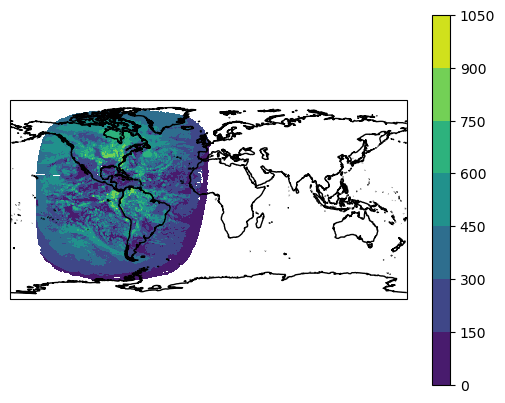

In [71]:
fig = plt.figure()
ax = plt.subplot(projection=ccrs.PlateCarree())

ax.set_global()

tmp = ax.contourf(X_rsr, Y_rsr, rsr, transform=ccrs.PlateCarree())
fig.colorbar(tmp)

ax.coastlines('50m')
plt.show()

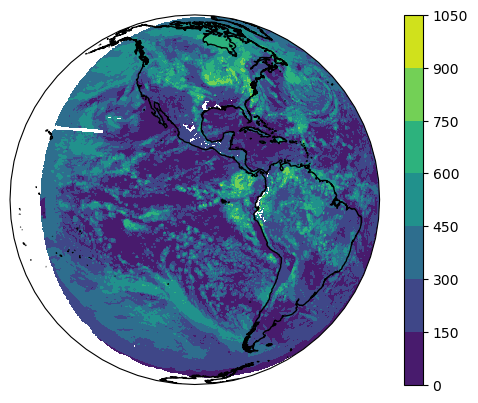

In [73]:
fig = plt.figure()
ax = plt.subplot(projection=ccrs.Orthographic(-100))

ax.set_global()

tmp = ax.contourf(X_rsr, Y_rsr, rsr, transform=ccrs.PlateCarree())
fig.colorbar(tmp)

ax.coastlines('50m')
plt.show()